Nhat Tran <br>
METAD654: Marketing Analytics <br>
Professor Gregory Page <br>
# Assignment 5 - Handling Time Series Data & Modeling with an Interaction Term

In [ ]:
# Import necessary functions to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### Part I: Working with Time Series Data
#### A. Pick any publicly-traded company that trades on the Nasdaq or the NYSE.
#### a. What company did you select, and what is it sticker symbol? Why did you pick this company?
I selected Six Flags Entertainment Corporation Common Stock New (ticker symbol: FUN). I chose this company because its business operations are closely aligned with Lobster Land, and it offers a useful point of comparison. It is also interesting to see how a major attraction and theme park operator performs in the market and responds to industry conditions.

#### B. Go to the Nasdaq homepage: www.nasdaq.com. Enter your company’s ticker symbol in “Symbol Search” area near the top of your screen. Next, click on “Historical Quotes” and adjust the settings so that it shows one year’s worth of share price data. Then, click on “Download Historical Data” to download this data as a CSV.

#### C. Bring the dataset into your environment. For this step, bring the dataset into your environment using read_csv() from pandas -- but now, add some extra parameters to that function: index_col= ‘Date’ and parse_dates=True.
#### a. Use the head() function to explore the variables, and show your results.

In [ ]:
six_flags = pd.read_csv("/Users/nhattran/Downloads/MSBA/METAD654 - Marketing Analytics/assignment 5/six_flags_ytd.csv",
                           index_col="Date", parse_dates=True)

In [ ]:
six_flags.head()

#### b. Rename the ‘Close/Last’ column to ‘Close’

In [ ]:
six_flags = six_flags.rename(columns={"Close/Last": "Close"})

#### c. Next, call the info() function on your dataset, and show your results.

In [ ]:
six_flags.info()

In [ ]:
six_flags.describe()

In [ ]:
# Remove all dollar signs and change the data type to float
six_flags = six_flags.replace({'\$': ''}, regex=True)
six_flags = six_flags.astype({'Close': float, 'Open': float, 'High': float, 'Low': float})
six_flags.head()

In this step, I removed the dollar signs from the price columns and converted them into float values so the data can be analyzed properly. Once cleaned, the dataset is ready for any calculations or modeling.

#### D. Is this dataframe indexed by time values? How do you know this?
Yes, this dataframe is indexed by time. I can tell because the index is made up of dates (e.g. “2025-11-14,” “2025-11-13”), which indicates that each row is organized and labeled by a specific point in time rather than by a simple numeric index.

#### E. Let’s visualize the entire time series.
#### a. First, just call .plot() on your dataframe object.

In [ ]:
six_flags.plot()

##### i. Describe what you see here. Why is this a challeging graph to interpret? What would make it easier to understand?
This graph shows five stock metrics: Close, Volume, Open, High, and Low, plotted from November 2024 to November 2025. Each metric is shown as a different colored line, but the y-axis combines both price values and Volume, which reaches into over the millions units. Because the price-based metrics stay within a much smaller range, their lines appear compressed while Volume dominates the scale.

The graph is hard to interpret because the shared y-axis has to stretch to fit the huge Volume values, which makes the price lines look almost flat. It would be much easier to read if Volume had its own y-axis or subplot, and if the chart included clearer labels or a legend to show which line represents each metric.

#### b. Now, re-run the .plot() function, but this time, call that function on the ‘Close’ variable only.

In [ ]:
six_flags["Close"].plot()

##### i. Now, in a couple sentences, describe what you see. Why is this graph more easily interpretable than the one you plotted in the previous step?
When I only plot the ‘Close’ variable, the graph clearly shows a downward trend in closing prices over time, with a slight fluctuations. The line is clear easy to follow, making it simple to see how the stock’s value declined from November 2024 to November 2025. This graph is easier to interpret than the previous plot because it focuses on a single variable with a consistent scale. By removing Volume, the y-axis now matches the scale of the prices, making it easy to see how the closing price changes over time.

#### c. Re-plot the ‘Close’ variable, and add a horizontal line representing the average closing price for the year.

In [ ]:
# Calculate average closing price
avg_close = six_flags["Close"].mean()

ax = six_flags["Close"].plot(figsize=(10, 5), title="Six Flags Close Price")
ax.axhline(y=avg_close, color='red', linestyle='--', label=f'Average: ${avg_close:.2f}')
ax.set_xlabel("Date")
ax.set_ylabel("Close Price ($)")
ax.legend()
plt.show()

##### What does this line help you see more clearly?
Adding a horizontal line for the average closing price makes the graph much easier to read by providing a clear benchmark. In this case, the red dashed line at $33.92 shows that the stock spent most of the year below its average, especially in the second half. This also makes it easy to compare the stock’s daily movements to its overall trend, highlighting when it was consistently above or below the average. Therefore, it easy to spot long-term trends and periods of underperformance or outperformance.

#### d. Use the .diff() method to calculate the daily change in the ‘Close’ price, and store the result in a new column called 'daily_change'.

In [ ]:
six_flags["daily_change"] = six_flags["Close"].diff()
six_flags.head()

##### i. Plot the 'daily_change' variable.

In [ ]:
six_flags["daily_change"].plot()

##### ii . What does this show that the original closing price plot did not?
For Six Flags, plotting the daily_change variable reveals the day-to-day volatility in the stock that the original closing price graph did not show. Instead of a smooth downward trend, the values oscillate around zero with both positive and negative spikes, highlighting short-term gains and losses. This makes it clear that Six Flags’ stock movement was more turbulent than the overall decline suggests, providing insight into its momentum and risk.

##### iii. Do you notice any periods of unusually high or low movement?
Yes, there are periods of unusually high and low movement. For example, there’s a sharp upward spike followed closely by a steep drop around mid-2025, suggesting a possible earnings announcement or noticable event that quickly affected market reactions. These significant swings stand out clearly in the daily_change graph and would be difficult to detect in the original closing price plot. Such periods are critical for analysts to investigate further, as they may signal turning points or underlying volatility that affects investment decisions.

#### e. Plotting a subset of your data
##### i. Using a slice operation, plot the daily ‘Close’ variable from your dataset for any one-month period of your choice.

In [ ]:
# Sort the dataframe index
six_flags = six_flags.sort_index()

# Slice the data for September 2025
six_flags_sep = six_flags["Close"]["2025-09-01":"2025-09-30"]
six_flags_sep.plot(title="Six Flags Close Price (September 2025)")

##### ii. Now, show the plot you drew with the previous step, but with a new figsize, line color, and style

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(six_flags_sep.index, six_flags_sep, color='blue', label='Close')
plt.title("Six Flags Close Price (September 2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

This chart shows Six Flags’ closing stock price throughout September 2025, fluctuating between roughly \\$21 and \\$26. The overall movement appears choppy, with no clear upward or downward trend, suggesting short-term volatility rather than directional momentum during that month.

### F . Rolling windows
#### a. Generate a 20-period moving average for your ‘Close’ variable, and create a plot that overlays this 20-period average atop the actual daily closing prices.

In [ ]:
six_flags["moving_avg_20"] = six_flags["Close"].rolling(window=20).mean()
six_flags.tail()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(six_flags["Close"], label="Close")
plt.plot(six_flags["moving_avg_20"], label="20-period MA")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Closing Price with 20-Period Moving Average")
plt.tight_layout()
plt.show()

#### b. Next, generate a 75-period moving average for your ‘Close’ variable, and create a plot that overlays this 75-period average atop the actual daily closing prices.

In [ ]:
six_flags["moving_avg_75"] = six_flags["Close"].rolling(window=75).mean()
six_flags.tail()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(six_flags["Close"], label="Close")
plt.plot(six_flags["moving_avg_75"], label="75-period MA")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Closing Price with 75-Period Moving Average")
plt.tight_layout()
plt.show()

#### c. How are your two moving average plots different from one another? What are some pros and cons of shorter and longer moving average windows?
The two moving average plots differ in the length of the window used to smooth the closing price data. The 20-period moving average reacts quickly to short-term fluctuations and closely follows the daily ups and downs, making it more jagged. The 75-period moving average smooths out more noise, highlighting the broader trend over time, but it lags behind recent price movements and adjusts more slowly.

Shorter windows like 20 periods are helpful for spotting short-term momentum and quick shifts in direction, though they can be sensitive to noise and produce false signals. Longer windows like 75 periods are better for identifying long-term trends and filtering out daily volatility, but they respond more slowly, which can delay recognition of turning points.

### G. Plot a rolling standard deviation for your time series data. You should be showing the rolling standard deviation for the ‘Close’ variable for this purpose. You can pick the size of the window for the rolling standard deviation.

In [ ]:
# Create rolling standard deviation (20-day window)
six_flags["rolling_std_20"] = six_flags["Close"].rolling(window=20).std()

plt.figure(figsize=(10, 5))
plt.plot(six_flags.index, six_flags["rolling_std_20"], color='blue')
plt.title("Six Flags Close Price: 20-Day Rolling Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.show()

#### a. What does your rolling standard deviation plot show you about your time series? (Note: this question is asking you about your results. It’s not asking about what a rolling standard deviation shows, in general).
The rolling standard deviation plot for ‘Close’ prices shows how the Six Flags’ stock volatility changed throughout 2025. Using a 20-day window, the graph highlights peaks and troughs, with spikes in mid-2025 indicating periods of higher uncertainty, and lower stretches where volatility drops closer to 1.

These bursts of volatility correspond to real-world events. In Q2 2025, Six Flags reported a net loss due to adverse weather and merger-related challenges, and in Q3 2025, the company recorded a large non-cash impairment charge. Such events likely caused rapid day-to-day price movements, explaining the spikes seen in the rolling standard deviation. Overall, the plot shows that the stock’s decline was not smooth or predictable. High-volatility periods meant greater uncertainty for investors, while low-volatility stretches offered more stable performance, providing a clearer picture of risk throughout the year.

**References:** https://www.tipranks.com/news/company-announcements/six-flags-reports-q2-2025-earnings-amid-weather-challenges

### H. Next, we will try something called resampling.
#### a. Resample your time series so that its values are based on quarterly time periods’ mean values for ‘Close’, rather than daily periods.

In [ ]:
# Resample the 'Close' column to quarterly frequency and calculate the mean
six_flags_closeq = six_flags['Close'].resample('QE').mean()
six_flags_closeq.head()

##### i. Plot this newly-resampled time series, with the dates on the x-axis, and the Close values on the y-axis.

In [ ]:
plt.figure(figsize=(10, 6))
six_flags_closeq.plot(marker='o')
plt.title('Six Flags Average Close Price (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Average Close Price ($)')
plt.grid(True)
# Annotate the data points
for date, value in zip(six_flags_closeq.index, six_flags_closeq.values):
    plt.text(date, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

This chart shows a steady decline in Six Flags’ average closing stock price over five consecutive quarters, falling from \\$47.10 in late 2024 to \\$21.34 by Q4 2025, with the steepest drop between Q1 and Q2 of 2025. By using quarterly averages, the chart smooths out daily fluctuations and highlights the overall trend more clearly. This makes it easier to see sustained downward pressure on the stock and identify periods of significant change.

##### ii. Provide an example that explains why someone might care about resampling a time series. To answer this, you may use ANY other example that you can think of, or discover, from any field that uses time series data (health, weather, etc.) - but do not mention stock market data for this answer, since we've already covered it here. You don't need to perform any outside research or go too deeply into domain knowledge here -- 3-4 thoughful sentences are all you need.
A retail analyst tracking daily sales at a chain of toy stores can see a lot of fluctuations in the raw data. Resampling the data into weekly or monthly averages makes it easier to compare different periods, such as the holiday season or Black Friday versus regular months. For example, December and the week of Black Friday consistently show higher average sales than other months, helping the business plan inventory, staffing, and promotions more effectively. By smoothing out daily noise, resampling provides a clearer picture of these seasonal patterns and supports smarter operational decisions.

### Part II: Marketing Mix Modeling with an Interaction Term

#### I. After reading the file into your environment, the first question that you will explore here is whether there is any relationship between marketing spending and conversions.

In [ ]:
lobster_campaign = pd.read_csv("/Users/nhattran/Downloads/MSBA/METAD654 - Marketing Analytics/assignment 5/marketing_campaign_lobster.csv")
lobster_campaign.head()

#### a. To explore this, first create a new variable that shows the total spending. This variable’s value should be the sum of influencer_spend, email_spend, and radio_spend.

In [ ]:
lobster_campaign["total_spending"] = lobster_campaign[["influencer_spend", "email_spend", "radio_spend"]].sum(axis=1)
lobster_campaign.head()

#### b. Now, find the correlation between this new total spending variable and conversions.

In [ ]:
lobster_campaign_corr = lobster_campaign["total_spending"].corr(lobster_campaign["conversions"])
print(f"The correlation between total spending and conversions: {lobster_campaign_corr:.4f}")

##### i . What is the correlation between these variables?
The correlation between total marketing spending (sum of influencer, email, and radio spend) and conversions is 0.8832, which indicates a strong positive relationship.

##### ii. What does this correlation suggest about the relationship between total marketing spending and conversion?
This strong correlation shows that higher total marketing spending is generally associated with more conversions. In other words, when more is invested in advertising, the dataset suggests conversion numbers tend to be higher.

##### iii. Why can't we conclude from this that more ad spending leads to more conversions?
However, this does not prove that higher ad spending directly causes more conversions. Other factors, such as seasonality, product quality, or external events, could be influencing both spending and results. Without testing the relationship through a controlled experiment or using a causal model, it is impossible to determine whether higher ad spending actually drives more conversions or if other factors are the main reason.

#### c. Next, let’s explore the relationship among the influencer ad spending, email ad spending, and radio ad spending variables. Examine the correlations among these three variables.

In [ ]:
# Compute correlation matrix for the three spending variables
corr_matrix = lobster_campaign[['influencer_spend','email_spend','radio_spend']].corr()

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Ad Spending Variables")
plt.show()

##### i. Are any of these correlations so high that we might not be able to use them together in a linear model?
None of the ad spending variables are highly correlated, so multicollinearity is not a concern for a linear model. The highest correlation is only 0.11 between influencer and radio spend, which is very low. This means each variable gives mostly separate information, so they can be used together in a regression without messing up the results.

#### d. Now, build a model that uses conversions as the outcome variable, with influencer spending, email ad spending, and radio ad spending as the input variables. 

In [ ]:
# Define predictors (X) and outcome (y)
X = lobster_campaign[['influencer_spend', 'email_spend', 'radio_spend']]
y = lobster_campaign['conversions']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

##### i. What's the p-value and the F-statistic for this model? What does this suggest about the model?
The F-statistic for the model is 449.0, with a p-value of 1.80e-73, which is extremely small. This indicates that the overall model is statistically significant, meaning at least one of the predictors meaningfully explains variation in conversions and the model does a good job fitting the data.

##### ii. What are the p-values for each of the individual predictors used in this model? What does this suggest about these predictors?
Looking at the individual predictors, influencer spend and email spend both have p-values of 0.000, showing they are significant contributors to conversions. Radio spend, on the other hand, has a p-value of 0.430, which is not significant. This suggests that radio spend does not have a meaningful effect on conversions in this model and may not be as helpful as other variables with prediction.

#### e. Lobster Land's marketing team is investigating how different types of advertising spend impact the number of conversions. In particular, they want to understand whether the effect of influencer marketing depends on the level of email marketing spend. They need you to create an interaction plot to visualize the relationship between influencer_spend and conversions, across different levels of email_spend.
##### i. First, create a new variable called email_spend_group by dividing email_spend into three groups: low, medium, and high (you can use pd.qcut() for this).

In [ ]:
lobster_campaign['email_spend_group'] = pd.qcut(
    lobster_campaign['email_spend'],
    q=3,
    labels=['Low','Medium','High']
)

print(lobster_campaign[['email_spend','email_spend_group']])

##### ii. Then, plot conversions against influencer_spend, using different colored lines for each email_spend_group.
##### iii. Use seaborn.lmplot() or something similar to draw trend lines for each group.

In [ ]:
sns.lmplot(
    data=lobster_campaign,
    x='influencer_spend',
    y='conversions',
    hue='email_spend_group',
    height=5,
    aspect=1.2,
    palette='Set1'
)
plt.title("Interaction Plot: Influencer Spend vs Conversions by Email Spend Group")
plt.show()

##### iv. What đo the different slopes tell you? Is there visual evidence of an interaction between influencer_spend and email_spend? How would the lines appear if there were no interaction? 
The different slopes show that the effect of influencer spend on conversions depends on the level of email spend. For instance, the green "High" group has the steepest slope, meaning influencer marketing drives the most conversions when email spend is also high. The red "Low" group has a much flatter slope, indicating that influencer spend is less effective at lower levels of email spend.

There is visual evidence of an interaction because the lines diverge rather than staying parallel, showing that the impact of influencer spend varies with email spend. If there were no interaction, the lines would be roughly parallel, indicating that influencer spend affects conversions the same way regardless of email spending level. The vertical position of each line might differ (due to additive effects), but the slopes would be similar.

#### f. Build yet another model -- this time, you will again use conversions as the outcome variable. Your inputs will be influencer ad spending, email ad spending, and an interaction variable for influencer ad spending & email ad spending.

In [ ]:
# Create an interaction variable for influencer ad spendinng and email ad spending
lobster_campaign['interaction'] = (lobster_campaign['influencer_spend'] * lobster_campaign['email_spend'])
print(lobster_campaign[['influencer_spend','email_spend','interaction']])

In [ ]:
# Define predictors (X) and outcome (y)
X = lobster_campaign[['influencer_spend', 'email_spend', 'interaction']]
y = lobster_campaign['conversions']

X = sm.add_constant(X)
model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())

##### i. What do you notice about the p-values for each of these predictors?
In the interaction model, all three predictors are statistically significant. Influencer spend has a positive effect on conversions (coef = 0.4262, p = 0.000), and email spend also contributes meaningfully (coef = 0.3122, p = 0.004). The interaction term is positive and highly significant (coef = 0.0147, p = 0.000), showing that conversions are not driven by either channel on its own. Instead, the two variables complement with each other, and the impact of influencer marketing becomes stronger when email marketing spend is higher. This combined effect definitely improves performance.

##### ii. How does the R-squared of this model compared to the R-squared of the model built to predict conversions, but with only influencer speding and email ad spending, but without the interaction? (you will need to generate another model to answer this, but it won't take long?
The model with the interaction term explains about 95 percent of the variation in conversions (R² = 0.954). In comparison, the model without the interaction shows about 90 percent (R² = 0.902). Both models perform well, but the interaction model captures the data more effectively. The increase in R² indicates that adding the interaction term provides meaningful predictive value and offers a more realistic view of how the marketing team at Lobster Land would optimize their budget.

##### iii. Demonstrate what your model would predict for a marketer using 100 units of influencer ad spending and 50 units of email ad spending. What conversions outcome should this marketer expect to see?

$$
\text{conversions} = \beta_0 
+ \beta_1 \cdot \text{influencer\_spend} 
+ \beta_2 \cdot \text{email\_spend} 
+ \beta_3 \cdot (\text{influencer\_spend} \times \text{email\_spend})
$$

Whereas, the coefficients are:
- Intercept ($\beta_0$) = -1.4199  
- Influencer spend ($\beta_1$) = 0.4262  
- Email spend ($\beta_2$) = 0.3122  
- Interaction ($\beta_3$) = 0.0147

And given the Influencer spend = 100; Email spend = 50
- Interaction = 100 × 50 = 5000


The predicted conversion is:
$$
\text{conversions} = -1.4199 
+ (0.4262 \times 100) 
+ (0.3122 \times 50) 
+ (0.0147 \times 5000)
$$

$$
= -1.4199 + 42.62 + 15.61 + 73.5
$$

$$
= 130.3
$$

This prediction translates the regression results into a practical forecast: with 100 units of influencer spend and 50 units of email spend, the team should expect about 131 conversions. The interaction term alone contributes roughly 73.5 of these conversions, which is more than the individual contributions from influencer or email spend. This shows that the combined effect of the two channels is a major driver of total conversions.

##### iv. In a few sentences, how do you interpret the interaction effect between influencer ad spending and email ad spending? What is this effect showing us?
The interaction effect shows that influencer spend becomes more effective when it is paired with an increase in email spend. Instead of operating independently, the two channels complement one another, meaning the impact of influencer campaigns increases when email marketing is also strong. For Lobster Land, this suggests that bundling influencer and email efforts will produce better conversion outcomes than investing in either channel on its own. One suggestion is that Lobster Land could boost results by running influencer promotions that drive users to sign up for an email offer, then following up with targeted emails that convert that traffic into purchases.

#### g. Find an example, or make up an example, of an interaction term in a model (this can be from the world of marketing, or from anywhere else). A very good answer to the last part of this question will include some genuine reaction from you -- finding an example of an interaction effect is only a ‘half-credit’ answer here.
##### i. In a 3-5 sentence paragraph describe what you found (or invented). What are the variables that make up this interactions? Is the effect of their interaction on the outcome positive, or negative? How do you feel about the interaction? Does it make sense to you? Or does it surprise you?
I revisited the previous example of interaction between price promotions and seasonality, and it feels especially relevant with Thanksgiving, Black Friday, and Christmas coming up. A discount on its own usually increases sales, but the effect shifts depending on how strong natural demand already is. During this holiday period, people are already motivated to shop for gifts, so promotions often create a smaller incremental lift compared to slower months when a discount can genuinely change purchase behavior. I also notice this firsthand during Black Friday, which is considered the biggest shopping holiday in the U.S. Brands advertise massive 30 to 70 percent discounts, but when I actually go into stores or shop online, the “big sale” items are often past-season inventory, while newer items are excluded from the promotion, so the real savings feel much smaller than advertised. It makes me realize that timing, product mix, and shopper expectations all interact with the promotion itself, which explains why the true effect isn’t always as strong as it looks on paper.


### Part III: Wildcard: Google Trends 

I chose Uber Eats vs. DoorDash, two of the most popular food delivery apps, for my Google Trends comparison. As a student who’s at times too busy to cook and doesn’t own a car, these food delivery apps are very convenient, and since I personally use Uber Eats far more often, I expected its search interest to dominate. To my surprise, the trend data showed that DoorDash actually comes out on top overall. I also adjusted the timeframe to the past 90 days since we’re entering the transition from fall to winter, when people tend to order delivery more during colder weather.

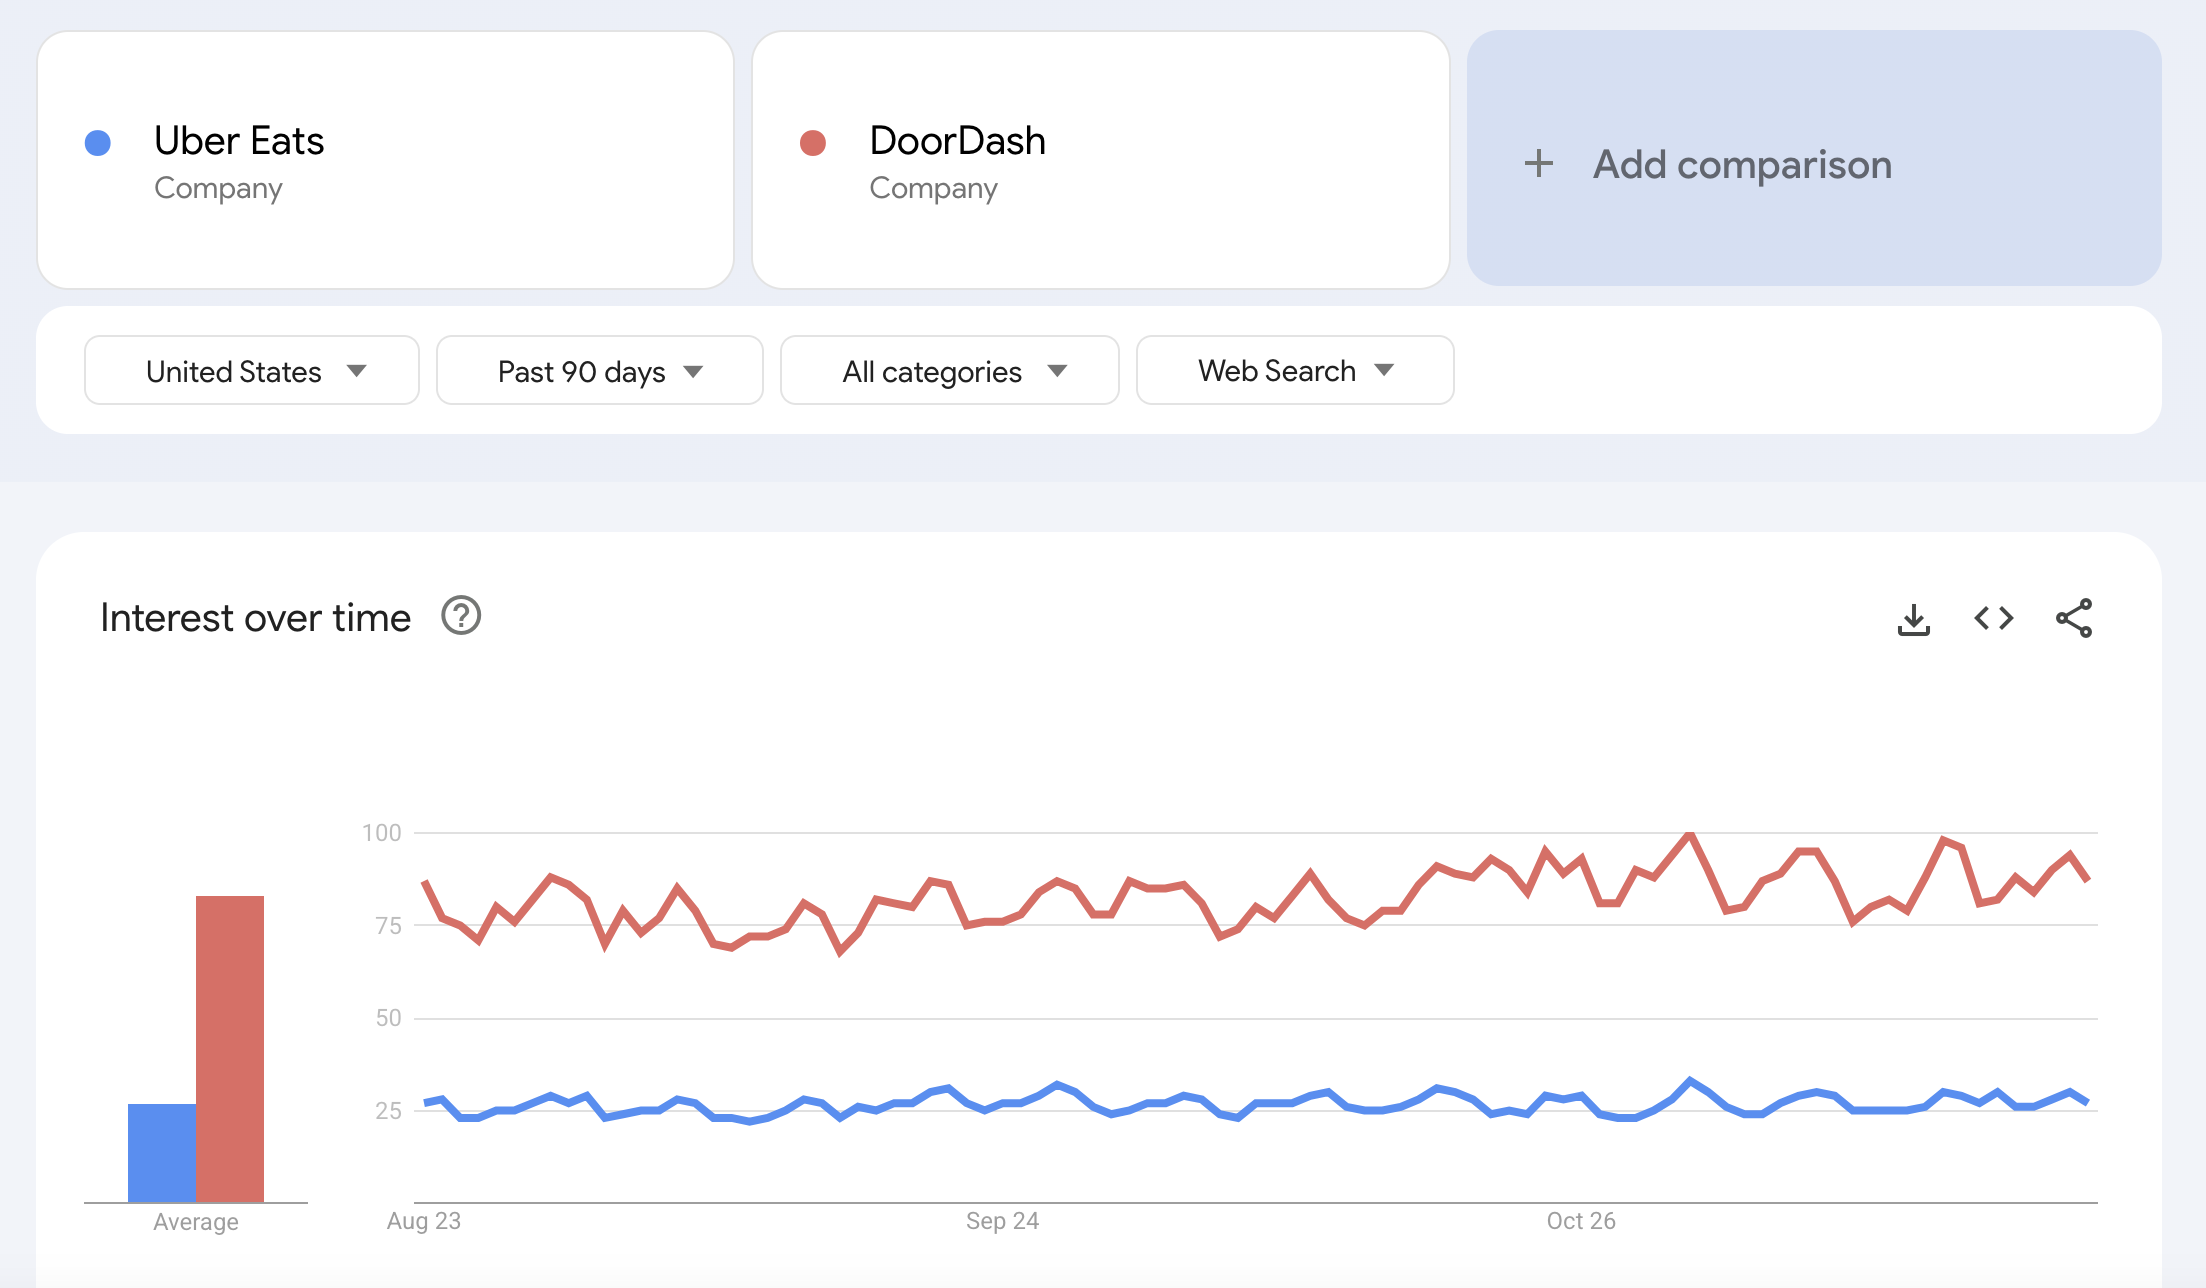

From the Google Trends map, DoorDash shows clear nationwide dominance, while Uber Eats has slightly higher relative interest in places such as Hawaii, Washington D.C., New York, Florida, and Connecticut, though still only accounting for around 29% to 36% of total search interest.

One major factor that helps explain DoorDash’s widespread popularity is its strategic partnerships—particularly with large banks. For example, Bank of America offers a full free year of DashPass membership to Gold-tier customers, which dramatically reduces delivery fees and encourages frequent use. Because Bank of America operates nationally and has a large customer base, this partnership likely boosts DoorDash’s popularity across the U.S. far more consistently than Uber Eats. Meanwhile, Uber Eats’ slightly stronger pockets of interest make sense in dense urban areas where people already use Uber all the time, so the food delivery app feels familiar and easy to adopt. For example, in New York City many people rely on Uber for transportation, so it makes sense that this familiarity leads to higher interest in Uber Eats compared to other states.

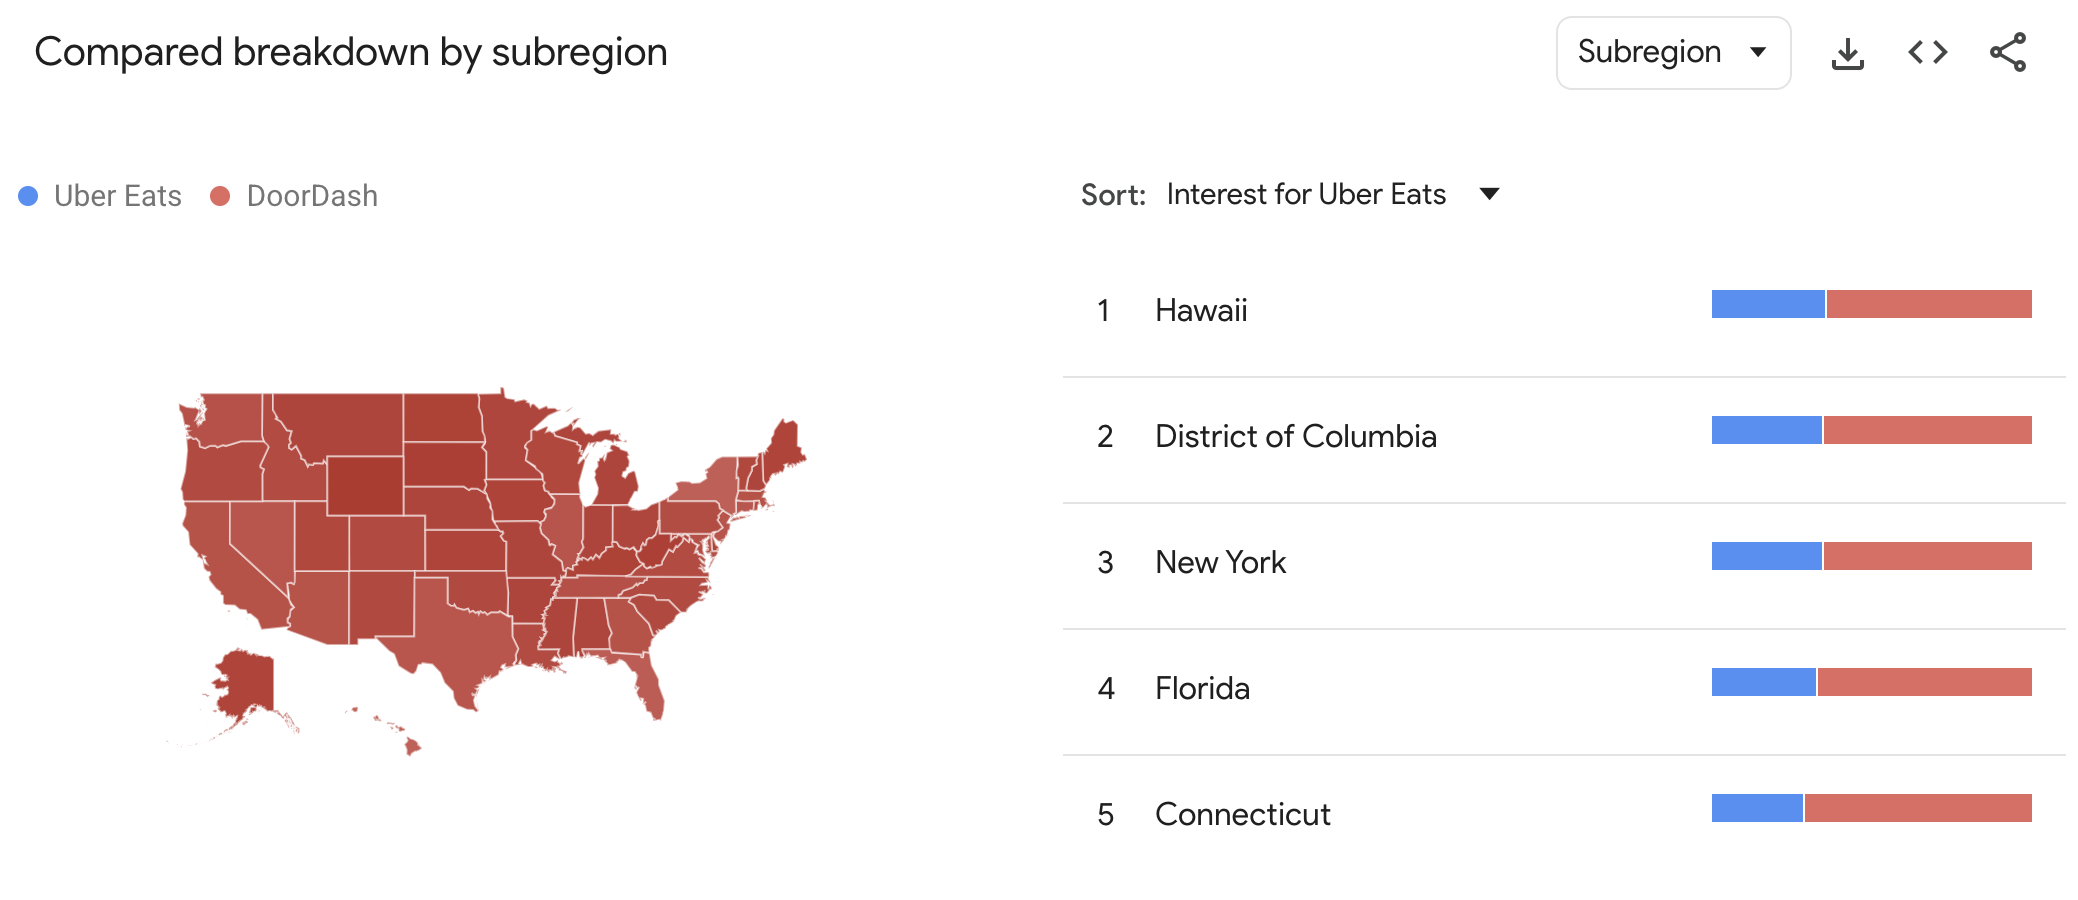

### Uber Eats:
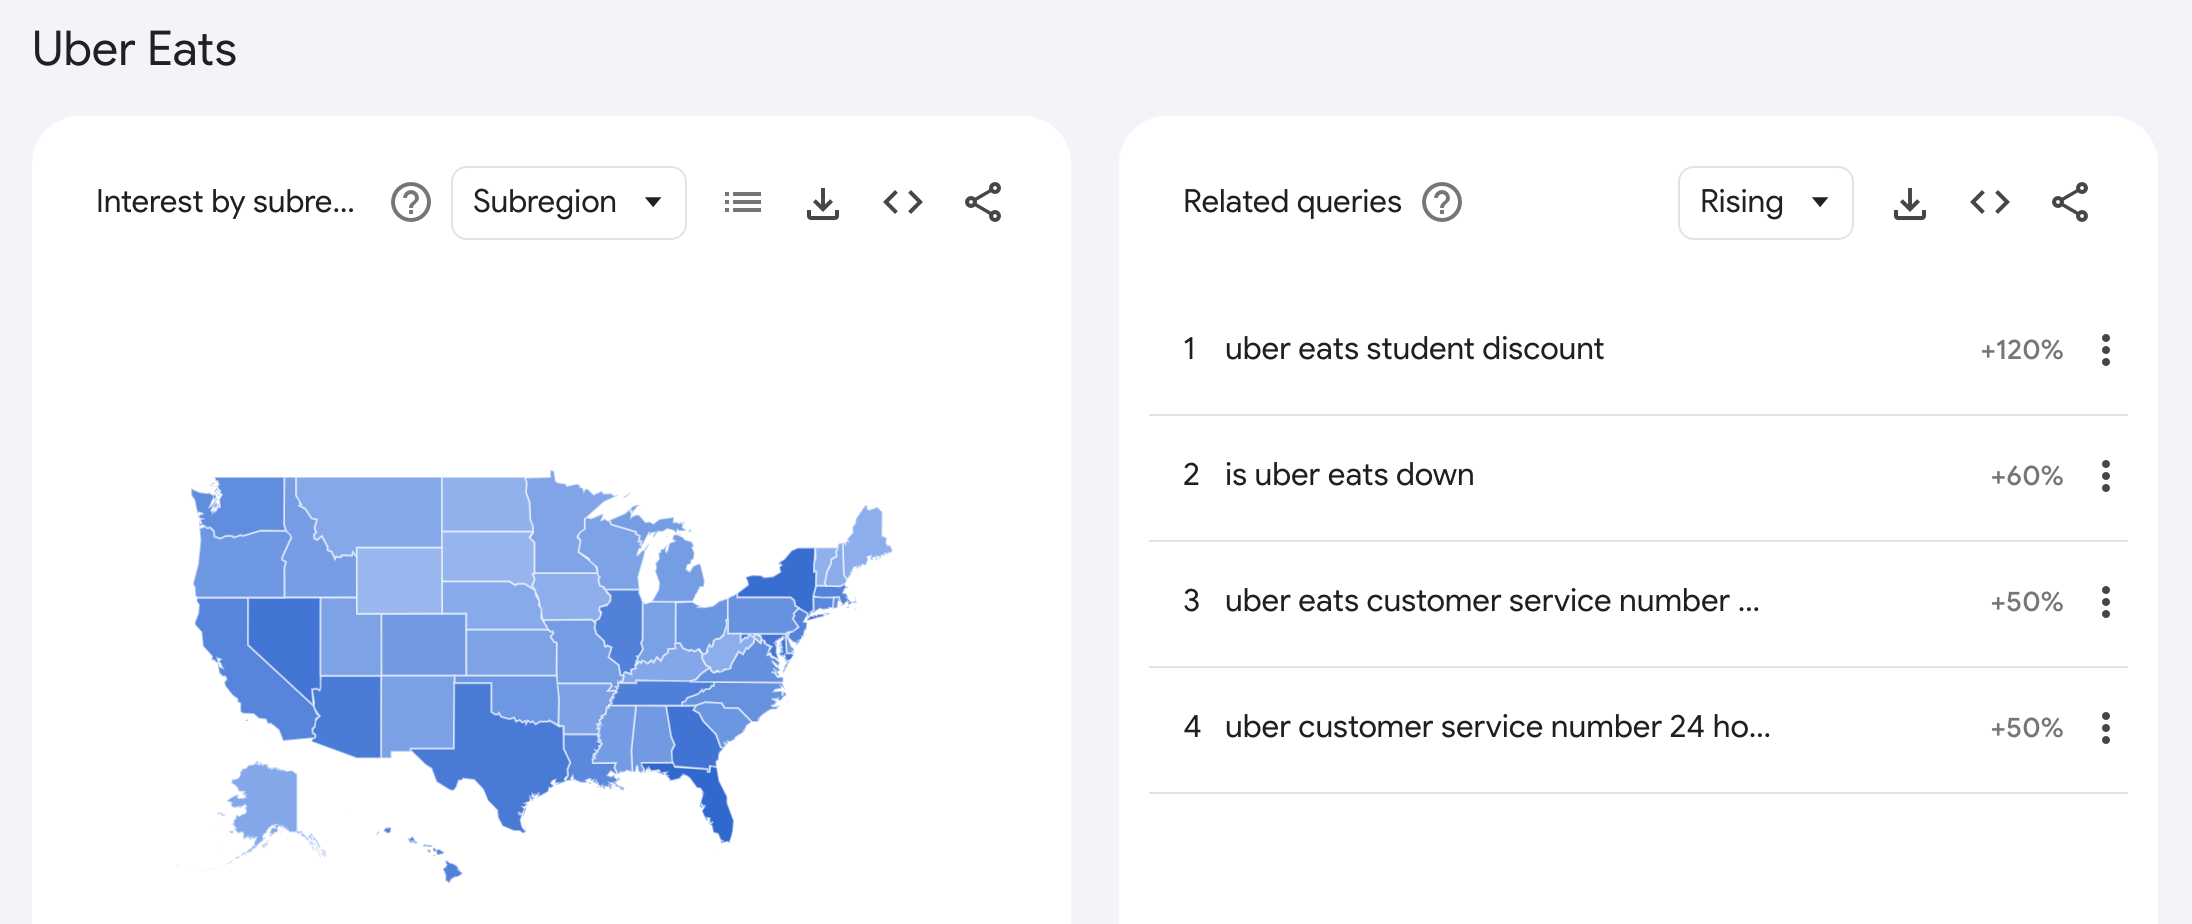

The top rising related query for Uber Eats is “uber eats student discount,” which has surged by 120 percent. This shows that students are actively looking for cheaper delivery options, especially during busy school months when they rely on convenience but still need to save money. As a student myself, this search trend makes sense because Uber has recently promoted discounted Uber One memberships for students, which naturally drives more searches.

### DoorDash:
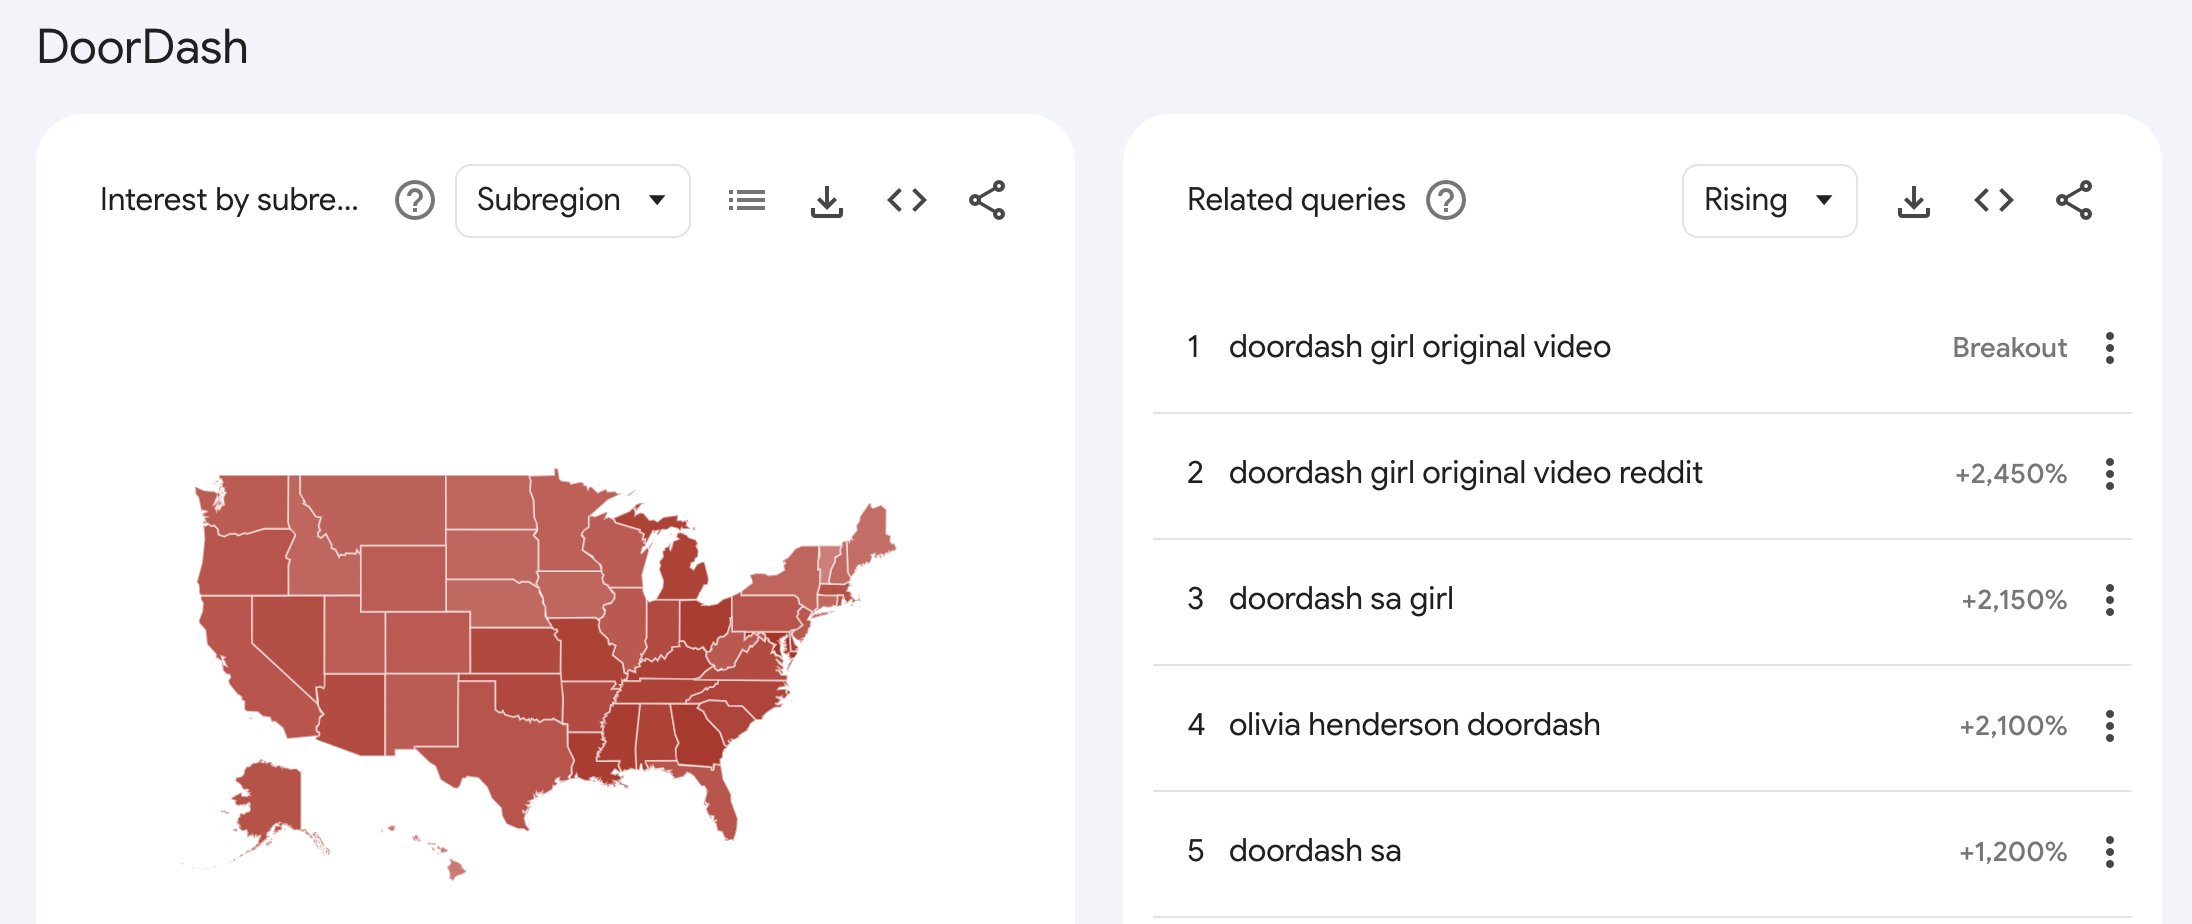

Four out of five rising related queries for DoorDash are tied to the phrase “doordash girl," which is clearly tied to a viral clip that has been circulating on social media. The huge spike in searches, jumping by +2,500%, shows how quickly online scandal/hot topic can spill over into brand-related search behavior even when it has nothing to do with the service itself. It’s interesting to see how a single viral moment can overshadow more practical or brand-focused searches.

**Implementation:** <br>
Google Trends is really valuable for marketers because it shows what people are actually searching for in real time. For example, I noticed recently that DoorDash's related queries were mostly about a viral "doordash girl", which is clearly driven by social media rather than anything related to the company’s actual service, showing how quickly online trends can distort what people are looking for. A marketer could use this to adjust their approach, either address the trend if it's affecting the brand, or redirect focus toward promos, loyalty programs, or partnerships. With Uber Eats, the surge in searches for student discounts shows clear interest in saving money, giving marketers an significant opportunity to target students with specific campaigns such as giving out monthly discounts towards the end of the month or student discount monthly memberships. Another practical use is timing: since Uber Eats showed pockets of higher interest in major cities, marketers could tailor region-specific promotions in areas where the app naturally has stronger recognition.